In [8]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from Utilities import TimeRange
from Hms import Hms, ParamDefKeywords
from Timeline import generateDataFrame, generateTable


Build a list of parameter definitions

In [9]:
rpe_params = [
    Hms.getParameterDef('APPT1088', False),
    Hms.getParameterDef('APPT1089', False),
    Hms.getParameterDef('APPT1090', False)
]


Time ranges for the test

In [10]:
start = datetime.utcnow() - timedelta(days=2)
end = start + timedelta(days=1)

Build a pandas DataFrame for a single parameter, with the MIB parameter mame as the column name 

In [11]:
df1 = generateDataFrame(start, end, [ Hms.getParameterDef('FAAT2010', True) ], colName=ParamDefKeywords.name)
print(df1)

               POSIX                  UTC_STRING FAAT2010
0      1694995200117  2023-09-18T00:00:00.117000   ATM_TP
1      1694995200117  2023-09-18T00:00:00.117000   ATM_TP
2      1694995201857  2023-09-18T00:00:01.857000   ATM_TP
3      1694995202117  2023-09-18T00:00:02.117000   ATM_TP
4      1694995202117  2023-09-18T00:00:02.117000   ATM_TP
...              ...                         ...      ...
20177  1695008316143  2023-09-18T03:38:36.143000   ATM_TP
20178  1695008316143  2023-09-18T03:38:36.143000   ATM_TP
20179  1695008317887  2023-09-18T03:38:37.887000   ATM_TP
20180  1695008318143  2023-09-18T03:38:38.143000   ATM_TP
20181  1695008318143  2023-09-18T03:38:38.143000   ATM_TP

[20182 rows x 3 columns]


Build a pandas DataFrame for a list of parameters, with the MIB parameter description as the column name 

In [12]:
df2 = generateDataFrame(start, end, rpe_params, colName=ParamDefKeywords.description)
print(df2)

               POSIX                  UTC_STRING DB_AOCS_AHK_C_AX_ER_A_SP  \
0      1694945236966  2023-09-17T10:07:16.966000    9.822190172315004e-09   
1      1694945237966  2023-09-17T10:07:17.966000    7.544930014091733e-09   
2      1694945238966  2023-09-17T10:07:18.966000   1.3489800387844753e-08   
3      1694945239967  2023-09-17T10:07:19.967000     8.06960009924751e-09   
4      1694945240866  2023-09-17T10:07:20.866000   -2.710220048385281e-09   
...              ...                         ...                      ...   
66914  1695008314078  2023-09-18T03:38:34.078000    6.256290152606425e-09   
66915  1695008315078  2023-09-18T03:38:35.078000   1.2664400195205872e-08   
66916  1695008316078  2023-09-18T03:38:36.078000   -6.793170026497819e-09   
66917  1695008317078  2023-09-18T03:38:37.078000  -1.8104799881513145e-09   
66918  1695008318078  2023-09-18T03:38:38.078000   -2.546419963778135e-08   

      DB_AOCS_AHK_C_AY_ER_A_SP DB_AOCS_AHK_C_AZ_ER_A_SP  
0      -1.6441800

Build an AstroPy Table

In [13]:
astropytable = generateTable(start, end, rpe_params, colName=ParamDefKeywords.name)
print(astropytable)

    POSIX             UTC_STRING         ...         APPT1090       
------------- -------------------------- ... -----------------------
1694945236966 2023-09-17T10:07:16.966000 ... -4.7476399345214304e-07
1694945237966 2023-09-17T10:07:17.966000 ...  -4.787950160789478e-07
1694945238966 2023-09-17T10:07:18.966000 ...  -4.855219799537736e-07
1694945239967 2023-09-17T10:07:19.967000 ...  -4.845099965677946e-07
1694945240866 2023-09-17T10:07:20.866000 ...  -4.690770083470852e-07
1694945240966 2023-09-17T10:07:20.966000 ... -4.5556299710369785e-07
1694945241966 2023-09-17T10:07:21.966000 ... -4.5966498873895034e-07
1694945242966 2023-09-17T10:07:22.966000 ...  -3.866780104999634e-07
1694945243966 2023-09-17T10:07:23.966000 ...  -3.991779919942928e-07
1694945244966 2023-09-17T10:07:24.966000 ...  -3.678509870042035e-07
          ...                        ... ...                     ...
1695008309078 2023-09-18T03:38:29.078000 ...  -1.986179967161661e-07
1695008310078 2023-09-18T03:38:30.

Plot a column, note that we have to cast the parameters to the correct type as they are stored as strings

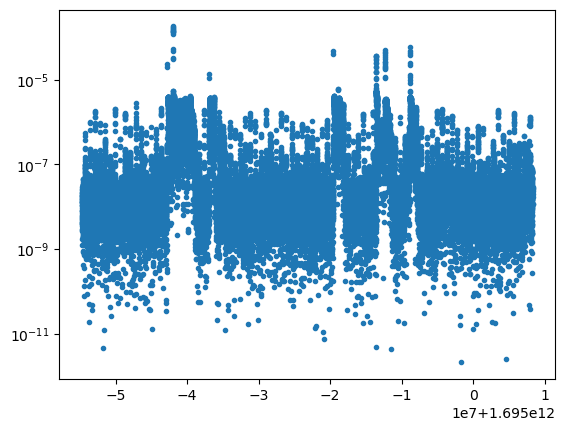

In [14]:
plt.plot(df2['POSIX'], df2['DB_AOCS_AHK_C_AY_ER_A_SP'].astype(float), '.')
plt.yscale('log')
plt.show()
